<a href="https://colab.research.google.com/github/lenocahya/heart-disease-bk/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Mengumpulkan Data

Dataset yang digunakan merupakan dataset yang berasal dari dataset heart disease dari https://archive.ics.uci.edu/dataset/45/heart+disease. Terdapat berapa dataset, namun pada penelitian ini digunakan dataset hungarian.data


Dataset telah disimpan pada gdrive sehingga load dataset mengambil dari google drive "/content/drive/MyDrive/heart-disease/heart+disease/hungarian.data"



# 2. Menelaah Data

In [ ]:
import pandas as pd
import re
import numpy as np
import itertools

Pada dataset yang diload dari hungarian.data ternyata susunan data yang ditampilkan tidak terstruktur sehinga perlu dilakukan penyusunan ulang sesuai deskripsi pada heart-disease.names

In [ ]:
dataset = "/content/drive/MyDrive/heart-disease/heart+disease/hungarian.data"

In [ ]:
with open(dataset, encoding='Latin1') as file:
  lines = [line.strip() for line in file]

In [ ]:
lines

['1254 0 40 1 1 0 0',
 '-9 2 140 0 289 -9 -9 -9',
 '0 -9 -9 0 12 16 84 0',
 '0 0 0 0 150 18 -9 7',
 '172 86 200 110 140 86 0 0',
 '0 -9 26 20 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 12',
 '20 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name',
 '1255 0 49 0 1 0 0',
 '-9 3 160 1 180 -9 -9 -9',
 '0 -9 -9 0 11 16 84 0',
 '0 0 0 0 -9 10 9 7',
 '156 100 220 106 160 90 0 0',
 '1 2 14 13 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 11',
 '20 84 1 -9 -9 2 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name',
 '1256 0 37 1 1 0 0',
 '-9 2 130 0 283 -9 -9 -9',
 '0 -9 -9 1 11 21 84 0',
 '0 0 0 0 100 10 -9 5',
 '98 58 180 100 130 80 0 0',
 '0 -9 17 14 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 11',
 '26 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name',
 '1257 0 48 0 1 1 1',
 '-9 4 138 0 214 -9 -9 -9',
 '0 -9 -9 0 9 21 84 0',
 '0 0 0 0 50 5 4 4',
 '108 54 210 106 138 86 1 0',
 '1.5 2 19 22 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 9',
 '30 84 3 -9 2 -9 -9 2',
 '-9 -9 -9 2 -9 1 1 1',
 '1 

Terdapat 76 fitur pada dataset hungarian.data

pada dataset yang ditampilkan, berupa array dengan susunan untuk 76 fitur ditampilkan setiap 10 array.

In [ ]:
lines[0:10]

['1254 0 40 1 1 0 0',
 '-9 2 140 0 289 -9 -9 -9',
 '0 -9 -9 0 12 16 84 0',
 '0 0 0 0 150 18 -9 7',
 '172 86 200 110 140 86 0 0',
 '0 -9 26 20 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 12',
 '20 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name']

In [ ]:
data = itertools.takewhile(
    lambda x: len(x)==76,
    (' '.join(lines[i:(i+10)]).split() for i in range (0, len(lines), 10))
)

In [ ]:
df = pd.DataFrame.from_records(data)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.,-9.,name
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,1053,0,48,0,0,0,0,-9,2,-9,...,-9,-9,1,1,1,1,1,-9.,-9.,name
290,1054,0,36,1,1,0,0,-9,2,120,...,-9,-9,1,1,1,1,1,-9.,-9.,name
291,5001,0,48,1,0,0,0,-9,3,110,...,-9,-9,1,1,1,1,1,-9.,-9.,name
292,5000,0,47,0,0,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       294 non-null    object
 1   1       294 non-null    object
 2   2       294 non-null    object
 3   3       294 non-null    object
 4   4       294 non-null    object
 5   5       294 non-null    object
 6   6       294 non-null    object
 7   7       294 non-null    object
 8   8       294 non-null    object
 9   9       294 non-null    object
 10  10      294 non-null    object
 11  11      294 non-null    object
 12  12      294 non-null    object
 13  13      294 non-null    object
 14  14      294 non-null    object
 15  15      294 non-null    object
 16  16      294 non-null    object
 17  17      294 non-null    object
 18  18      294 non-null    object
 19  19      294 non-null    object
 20  20      294 non-null    object
 21  21      294 non-null    object
 22  22      294 non-null    ob

Terdapat nilai missing value pada data tersebut dengan nilai -9. berupa folat, sehingga pada data fitur ke 76 atau yang terakhir dihapus karena tidak digunakan dan berupa data string.

In [ ]:
df = df.iloc[:,:-1]

In [ ]:
df = df.astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 75 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       294 non-null    float64
 1   1       294 non-null    float64
 2   2       294 non-null    float64
 3   3       294 non-null    float64
 4   4       294 non-null    float64
 5   5       294 non-null    float64
 6   6       294 non-null    float64
 7   7       294 non-null    float64
 8   8       294 non-null    float64
 9   9       294 non-null    float64
 10  10      294 non-null    float64
 11  11      294 non-null    float64
 12  12      294 non-null    float64
 13  13      294 non-null    float64
 14  14      294 non-null    float64
 15  15      294 non-null    float64
 16  16      294 non-null    float64
 17  17      294 non-null    float64
 18  18      294 non-null    float64
 19  19      294 non-null    float64
 20  20      294 non-null    float64
 21  21      294 non-null    float64
 22  22

# 3. Memvalidasi Data

Mengubah nilai -9.0 menjadi null atau np.nan untuk mengetahui berpa banyak missing value

In [ ]:
df.replace (-9.0, np.nan, inplace = True)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,1254.0,0.0,40.0,1.0,1.0,0.0,0.0,NaN,2.0,140.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,1255.0,0.0,49.0,0.0,1.0,0.0,0.0,NaN,3.0,160.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,1256.0,0.0,37.0,1.0,1.0,0.0,0.0,NaN,2.0,130.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
3,1257.0,0.0,48.0,0.0,1.0,1.0,1.0,NaN,4.0,138.0,...,NaN,2.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,1258.0,0.0,54.0,1.0,1.0,0.0,1.0,NaN,3.0,150.0,...,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,1053.0,0.0,48.0,0.0,0.0,0.0,0.0,NaN,2.0,NaN,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
290,1054.0,0.0,36.0,1.0,1.0,0.0,0.0,NaN,2.0,120.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
291,5001.0,0.0,48.0,1.0,0.0,0.0,0.0,NaN,3.0,110.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
292,5000.0,0.0,47.0,0.0,0.0,0.0,0.0,NaN,2.0,140.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 75 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       294 non-null    float64
 1   1       294 non-null    float64
 2   2       294 non-null    float64
 3   3       294 non-null    float64
 4   4       294 non-null    float64
 5   5       294 non-null    float64
 6   6       294 non-null    float64
 7   7       0 non-null      float64
 8   8       294 non-null    float64
 9   9       293 non-null    float64
 10  10      293 non-null    float64
 11  11      271 non-null    float64
 12  12      12 non-null     float64
 13  13      1 non-null      float64
 14  14      0 non-null      float64
 15  15      286 non-null    float64
 16  16      21 non-null     float64
 17  17      1 non-null      float64
 18  18      293 non-null    float64
 19  19      294 non-null    float64
 20  20      294 non-null    float64
 21  21      294 non-null    float64
 22  22

# 4. Menentukan Objek Data

Terdapat sebanyak 14 fitur yang dapat digunakan berdasarkan dokumentasi pada heart-disease.names

      -- 1. #3  (age)       
      -- 2. #4  (sex)       
      -- 3. #9  (cp)        
      -- 4. #10 (trestbps)  
      -- 5. #12 (chol)      
      -- 6. #16 (fbs)       
      -- 7. #19 (restecg)   
      -- 8. #32 (thalach)   
      -- 9. #38 (exang)     
      -- 10. #40 (oldpeak)   
      -- 11. #41 (slope)     
      -- 12. #44 (ca)        
      -- 13. #51 (thal)      
      -- 14. #58 (num)  (Predicted Attribute)

Karena index dataset dimulai dari 0 sehingga pada index fitur yang diambil sebagi berikut

[2,3,8,9,11,15,18,31,37,39,40,43,50,57]

In [ ]:
selected = [2,3,8,9,11,15,18,31,37,39,40,43,50,57]

In [ ]:
df_selected = df[selected]

In [ ]:
df_selected

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,48.0,0.0,2.0,NaN,308.0,0.0,1.0,NaN,NaN,2.0,1.0,NaN,NaN,0.0
290,36.0,1.0,2.0,120.0,166.0,0.0,0.0,180.0,0.0,0.0,NaN,NaN,NaN,0.0
291,48.0,1.0,3.0,110.0,211.0,0.0,0.0,138.0,0.0,0.0,NaN,NaN,6.0,0.0
292,47.0,0.0,2.0,140.0,257.0,0.0,0.0,135.0,0.0,1.0,1.0,NaN,NaN,0.0


In [ ]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       294 non-null    float64
 1   3       294 non-null    float64
 2   8       294 non-null    float64
 3   9       293 non-null    float64
 4   11      271 non-null    float64
 5   15      286 non-null    float64
 6   18      293 non-null    float64
 7   31      293 non-null    float64
 8   37      293 non-null    float64
 9   39      294 non-null    float64
 10  40      104 non-null    float64
 11  43      4 non-null      float64
 12  50      28 non-null     float64
 13  57      294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


In [ ]:
features_name = {
    2  : 'age',
    3  : 'sex',
    8  : 'cp',
    9 : 'trestbps',
    11 : 'chol',
    15 : 'fbs',
    18 : 'restecg',
    31 : 'thalach',
    37 : 'exang',
    39 : 'oldpeak',
    40 : 'slope',
    43 : 'ca',
    50 : 'thal',
    57 : 'num'
}

In [ ]:
df_selected.rename(columns=features_name, inplace=True)

<ipython-input-22-9c195e71bf85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns=features_name, inplace=True)


In [ ]:
df_selected

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,48.0,0.0,2.0,NaN,308.0,0.0,1.0,NaN,NaN,2.0,1.0,NaN,NaN,0.0
290,36.0,1.0,2.0,120.0,166.0,0.0,0.0,180.0,0.0,0.0,NaN,NaN,NaN,0.0
291,48.0,1.0,3.0,110.0,211.0,0.0,0.0,138.0,0.0,0.0,NaN,NaN,6.0,0.0
292,47.0,0.0,2.0,140.0,257.0,0.0,0.0,135.0,0.0,1.0,1.0,NaN,NaN,0.0


# 5. Membersihkan Data

In [ ]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        4 non-null      float64
 12  thal      28 non-null     float64
 13  num       294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


terdapat banyak data null atau missing value, sehingga perlu dicari jalan untuk menangani hal tersebut melalui mengisi data dengan mean atau nilai standar atau mungkin dilakukan drop data dengan missing value

In [ ]:
df_selected.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,294.000000,294.000000,294.000000,293.000000,271.000000,286.000000,293.000000,293.000000,293.000000,294.000000,104.000000,4.00,28.000000,294.000000
mean,47.826531,0.724490,2.982993,132.583618,250.848708,0.069930,0.218430,139.129693,0.303754,0.586054,1.894231,2.25,5.642857,0.792517
std,7.811812,0.447533,0.965117,17.626568,67.657711,0.255476,0.460868,23.589749,0.460665,0.908648,0.338995,4.50,1.615074,1.237006
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,1.000000,0.00,3.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,209.000000,0.000000,0.000000,122.000000,0.000000,0.000000,2.000000,0.00,5.250000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,243.000000,0.000000,0.000000,140.000000,0.000000,0.000000,2.000000,0.00,6.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,282.500000,0.000000,0.000000,155.000000,1.000000,1.000000,2.000000,2.25,7.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,3.000000,9.00,7.000000,4.000000


In [ ]:
columns_to_drop = ['slope', 'ca', 'thal']

In [ ]:
df_selected = df_selected.drop(columns_to_drop, axis=1)

In [ ]:
df_selected.isnull().sum()

age          0
sex          0
cp           0
trestbps     1
chol        23
fbs          8
restecg      1
thalach      1
exang        1
oldpeak      0
num          0
dtype: int64

Dikarenakan masih ada nilai null dibeberapa kolom fitur maka akan dilakukan pengisian nilai null menggunakan nilai mean di setiap kolomnya

In [ ]:
meanTBPS = df_selected['trestbps'].dropna()
meanChol = df_selected['chol'].dropna()
meanfbs = df_selected['fbs'].dropna()
meanRestCG = df_selected['restecg'].dropna()
meanthalach = df_selected['thalach'].dropna()
meanexang = df_selected['exang'].dropna()


In [ ]:
meanTBPS = meanTBPS.astype(float)
meanChol = meanChol.astype(float)
meanfbs = meanfbs.astype(float)
meanthalach = meanthalach.astype(float)
meanexang = meanexang.astype(float)
meanRestCG = meanRestCG.astype(float)

In [ ]:
meanTBPS = round(meanTBPS.mean())
meanChol = round(meanChol.mean())
meanfbs = round(meanfbs.mean())
meanthalach = round(meanthalach.mean())
meanexang = round(meanexang.mean())
meanRestCG = round(meanRestCG.mean())

mengubah nilai null menjadi nilai mean yang sudah ditentukan sebelumnya

In [ ]:
fill_values = {'trestbps': meanTBPS, 'chol': meanChol, 'fbs': meanfbs,
              'thalach':meanthalach,'exang':meanexang,'restecg':meanRestCG}
dfClean = df_selected.fillna(value=fill_values)

In [ ]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  294 non-null    float64
 4   chol      294 non-null    float64
 5   fbs       294 non-null    float64
 6   restecg   294 non-null    float64
 7   thalach   294 non-null    float64
 8   exang     294 non-null    float64
 9   oldpeak   294 non-null    float64
 10  num       294 non-null    float64
dtypes: float64(11)
memory usage: 25.4 KB


In [ ]:
dfClean.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
num         0
dtype: int64

melalukan pengecekan terhadap duplikasi data

In [ ]:
duplicate_rows = dfClean.duplicated()
dfClean[duplicate_rows]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


Menampilkan data yang duplikat

In [ ]:
print("All Duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
90,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


Drop data yang duplikat

In [ ]:
dfClean = dfClean.drop_duplicates()
print("All Duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num


In [ ]:
dfClean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


In [ ]:
dfClean['num'].value_counts()

0.0    187
1.0     37
3.0     28
2.0     26
4.0     15
Name: num, dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Mencari korelasi antar fitur dan di visualisasikan untuk dapat di analisis lebih mudah

In [ ]:
dfClean.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
age,1.000000,0.014516,0.146616,0.246571,0.087101,0.181130,0.050672,-0.460514,0.239223,0.178172,0.210429
sex,0.014516,1.000000,0.245769,0.082064,0.027695,0.044372,-0.108656,-0.106959,0.154925,0.115959,0.220732
cp,0.146616,0.245769,1.000000,0.081293,0.134697,0.031930,-0.016372,-0.367819,0.494674,0.351735,0.427536
trestbps,0.246571,0.082064,0.081293,1.000000,0.080818,0.096222,0.011256,-0.181824,0.211507,0.204000,0.214898
chol,0.087101,0.027695,0.134697,0.080818,1.000000,0.107686,0.048081,-0.122038,0.161055,0.106743,0.256027
fbs,0.181130,0.044372,0.031930,0.096222,0.107686,1.000000,0.047988,-0.069722,0.115503,0.063179,0.154319
restecg,0.050672,-0.108656,-0.016372,0.011256,0.048081,0.047988,1.000000,0.006084,0.041290,0.042193,0.042643
thalach,-0.460514,-0.106959,-0.367819,-0.181824,-0.122038,-0.069722,0.006084,1.000000,-0.400508,-0.300458,-0.367525
exang,0.239223,0.154925,0.494674,0.211507,0.161055,0.115503,0.041290,-0.400508,1.000000,0.624965,0.571710
oldpeak,0.178172,0.115959,0.351735,0.204000,0.106743,0.063179,0.042193,-0.300458,0.624965,1.000000,0.580732


<Axes: >

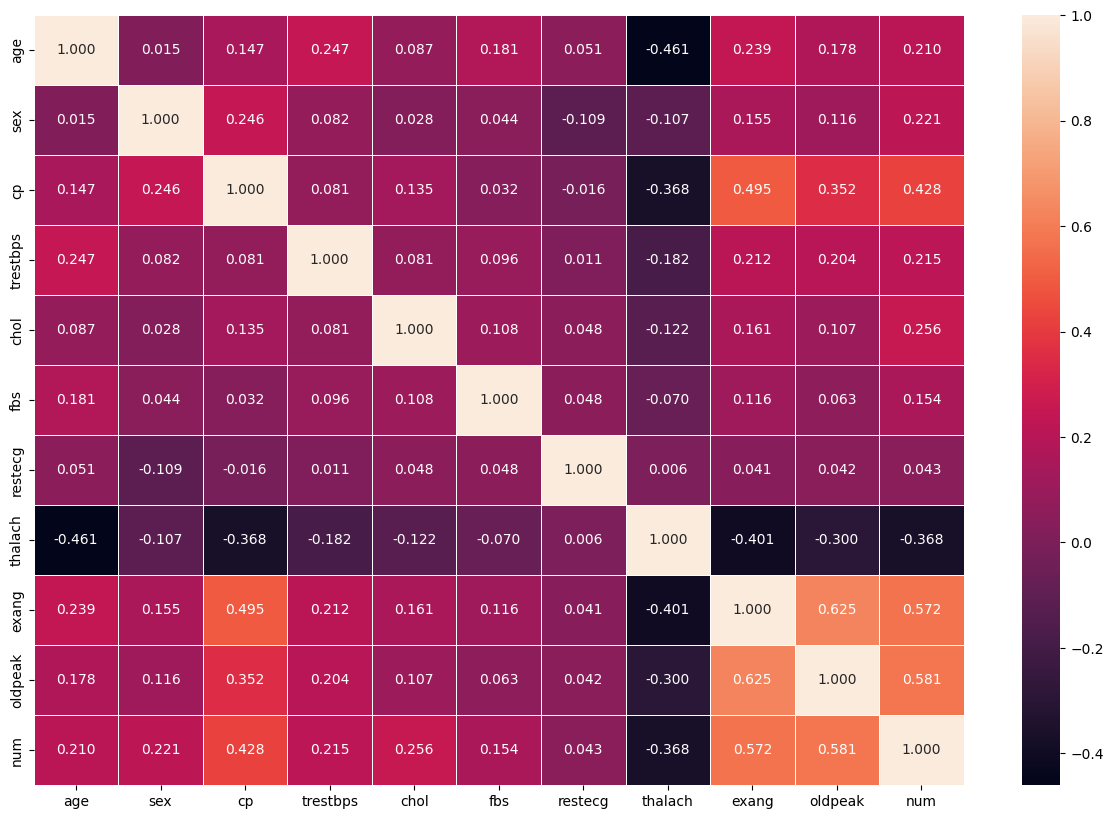

In [ ]:
cor_mat=dfClean.corr()
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f")

# Mengkontruksi Data

# Menentukan Label Data

# Membangun Model

# Mengevaluasi Model